# Pareto sets for data analysis

In [1]:
import pandas as pd
from paretoset import paretoset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
COLORS = list(plt.rcParams['axes.prop_cycle'].by_key()['color'])

## Example - finding a new apartment

In [3]:
# Data on apartment prices and square meters
# from central Oslo, Norway (april 2020)
apartments = [(13000, 38),
             (16000, 55),
             (29000, 74),
             (16600, 54),
             (16200, 68),
             (12300, 42),
             (15000, 42),
             (21000, 90),
             (13250, 43),
             (24000, 88), 
             (20000, 85),
             (12800, 48),
             (12300, 32),
             (16700, 66),
             (13000, 40),
             (23000, 90),
             (16000, 70),
             (24000, 77),
             (24000, 84),
             (15500, 84),
             (19000, 89),
             (12800, 33),
             (12900, 35),
             (14800, 64),
             (27000, 86),
             (19800, 79),
             (18800, 79),
             (19800, 63),
             (12900, 42),
             (15500, 65)]

# Load into a dataframe
df_apartments = pd.DataFrame(apartments, columns=["price", "square_meters"])

In [4]:
# Name, screen, RAM, HDD, weight, price

computers = [("Apple MacBook Air 13,3 128GB", 13.3, 8, 128, None, 9990),
            ("Asus ZenBook Pure UX430UN-PURE2", 14, 8, 256, 1.3, 7999),
            ("HP Pavilion Gaming 15-cx0015no", 15.6, 8, 256, 2.22, 5999),
            ("Huawei D15 (53010TTV)", 14, 8, 256, 1.53, 5495),
            ("Apple MacBook Air 13.3 256GB", 13.3, 8, 256, 1.29, 12495),
            ("Asus Chromebook C523", 15.6, 4, 32, 1.43, 3495),
            ("Huawei MateBook 13 (18140)", 13, 8, 256, None, 8995),
            ("Asus ZenBook UX433FN-A6094T", 14, 8, 256, 1.3, 7999),
            ("Microsoft Surface Laptop 2", 13.5, 8, 128, 1.283, 7999),
            ("Lenovo Ideapad S145 (81W80028MX)", 15.6, 8, 256, 1.85, 4690),
            ("Huawei MateBook 13 (51204)", 13, 8, 512, 1.3, 9995),
            ("Apple MacBook Air (Mid 2017)", 13.3, 8, 128, 1.35, 9199),
            ("Acer Nitro 5 (NH.Q5XED.018)", 15.6, 16, 512, 2.2, 8499)]


columns=["name", "screen", "RAM", "HDD", "weight", "price"]
df_computers = pd.DataFrame(computers, columns=columns)
len(df_computers)

13

In [5]:
print(df_computers.to_latex(index=False,))

\begin{tabular}{lrrrrr}
\toprule
                             name &  screen &  RAM &  HDD &  weight &  price \\
\midrule
     Apple MacBook Air 13,3 128GB &    13.3 &    8 &  128 &     NaN &   9990 \\
  Asus ZenBook Pure UX430UN-PURE2 &    14.0 &    8 &  256 &   1.300 &   7999 \\
   HP Pavilion Gaming 15-cx0015no &    15.6 &    8 &  256 &   2.220 &   5999 \\
            Huawei D15 (53010TTV) &    14.0 &    8 &  256 &   1.530 &   5495 \\
     Apple MacBook Air 13.3 256GB &    13.3 &    8 &  256 &   1.290 &  12495 \\
             Asus Chromebook C523 &    15.6 &    4 &   32 &   1.430 &   3495 \\
       Huawei MateBook 13 (18140) &    13.0 &    8 &  256 &     NaN &   8995 \\
      Asus ZenBook UX433FN-A6094T &    14.0 &    8 &  256 &   1.300 &   7999 \\
       Microsoft Surface Laptop 2 &    13.5 &    8 &  128 &   1.283 &   7999 \\
 Lenovo Ideapad S145 (81W80028MX) &    15.6 &    8 &  256 &   1.850 &   4690 \\
       Huawei MateBook 13 (51204) &    13.0 &    8 &  512 &   1.300 &   9995 \

In [6]:
mask = paretoset(df_computers[["RAM", "HDD", "price"]],
                sense=[max, max, min])

print(df_computers[mask].to_latex(index=False,))

\begin{tabular}{lrrrrr}
\toprule
                             name &  screen &  RAM &  HDD &  weight &  price \\
\midrule
             Asus Chromebook C523 &    15.6 &    4 &   32 &    1.43 &   3495 \\
 Lenovo Ideapad S145 (81W80028MX) &    15.6 &    8 &  256 &    1.85 &   4690 \\
      Acer Nitro 5 (NH.Q5XED.018) &    15.6 &   16 &  512 &    2.20 &   8499 \\
\bottomrule
\end{tabular}



In [7]:
mask = paretoset(df_computers[["RAM", "HDD", "weight", "price"]].fillna(0),
                sense=[max, max, min, min], distinct=True)

print(df_computers[mask].to_latex(index=False,))

\begin{tabular}{lrrrrr}
\toprule
                             name &  screen &  RAM &  HDD &  weight &  price \\
\midrule
  Asus ZenBook Pure UX430UN-PURE2 &    14.0 &    8 &  256 &   1.300 &   7999 \\
            Huawei D15 (53010TTV) &    14.0 &    8 &  256 &   1.530 &   5495 \\
             Asus Chromebook C523 &    15.6 &    4 &   32 &   1.430 &   3495 \\
       Huawei MateBook 13 (18140) &    13.0 &    8 &  256 &     NaN &   8995 \\
       Microsoft Surface Laptop 2 &    13.5 &    8 &  128 &   1.283 &   7999 \\
 Lenovo Ideapad S145 (81W80028MX) &    15.6 &    8 &  256 &   1.850 &   4690 \\
       Huawei MateBook 13 (51204) &    13.0 &    8 &  512 &   1.300 &   9995 \\
      Acer Nitro 5 (NH.Q5XED.018) &    15.6 &   16 &  512 &   2.200 &   8499 \\
\bottomrule
\end{tabular}



In [8]:
mask = paretoset(df_computers[["RAM", "HDD", "weight", "price"]].fillna(0),
                sense=[max, max, min, min], distinct=False)

print(df_computers[mask].to_latex(index=False,))

\begin{tabular}{lrrrrr}
\toprule
                             name &  screen &  RAM &  HDD &  weight &  price \\
\midrule
  Asus ZenBook Pure UX430UN-PURE2 &    14.0 &    8 &  256 &   1.300 &   7999 \\
            Huawei D15 (53010TTV) &    14.0 &    8 &  256 &   1.530 &   5495 \\
             Asus Chromebook C523 &    15.6 &    4 &   32 &   1.430 &   3495 \\
       Huawei MateBook 13 (18140) &    13.0 &    8 &  256 &     NaN &   8995 \\
      Asus ZenBook UX433FN-A6094T &    14.0 &    8 &  256 &   1.300 &   7999 \\
       Microsoft Surface Laptop 2 &    13.5 &    8 &  128 &   1.283 &   7999 \\
 Lenovo Ideapad S145 (81W80028MX) &    15.6 &    8 &  256 &   1.850 &   4690 \\
       Huawei MateBook 13 (51204) &    13.0 &    8 &  512 &   1.300 &   9995 \\
      Acer Nitro 5 (NH.Q5XED.018) &    15.6 &   16 &  512 &   2.200 &   8499 \\
\bottomrule
\end{tabular}



In [9]:
df_computers["weight"] = df_computers["weight"].fillna(0.1)


In [10]:
mask = paretoset(df_computers[["RAM", "HDD", "weight", "price"]],
                sense=[max, max, min, min])

print(sum(mask))

8


In [11]:
df_computers[~mask]

,name,screen,RAM,HDD,weight,price
0,"Apple MacBook Air 13,3 128GB",13.3,8,128,0.10,9990
2,HP Pavilion Gaming 15-cx0015no,15.6,8,256,2.22,5999
4,Apple MacBook Air 13.3 256GB,13.3,8,256,1.29,12495
7,Asus ZenBook UX433FN-A6094T,14.0,8,256,1.30,7999
11,Apple MacBook Air (Mid 2017),13.3,8,128,1.35,9199


# Visualizations

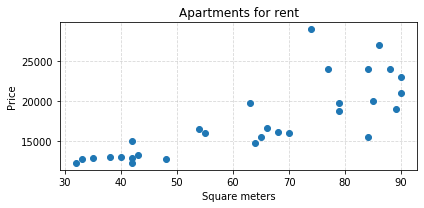

In [12]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Apartments for rent")

ax.scatter(df_apartments.square_meters, df_apartments.price, zorder=9)

ax.set_xlabel("Square meters")
ax.set_ylabel("Price")

ax.grid(True, ls="--", zorder=5, alpha=0.5)
plt.tight_layout()
plt.savefig("apartments1.pdf")

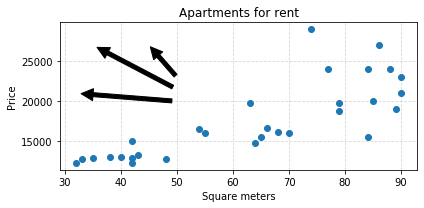

In [13]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Apartments for rent")

ax.scatter(df_apartments.square_meters, df_apartments.price, zorder=9)

ax.annotate('', xy=(35, 27000), xycoords='data', xytext=(50, 21500),
            arrowprops=dict(facecolor='black', shrink=0.05),
            zorder=50, fontsize=16
            )

ax.annotate('', xy=(45, 27000), xycoords='data', xytext=(50, 23000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            zorder=50, fontsize=16
            )

ax.annotate('', xy=(32, 21000), xycoords='data', xytext=(50, 20000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            zorder=50, fontsize=16
            )

ax.set_xlabel("Square meters")
ax.set_ylabel("Price")

ax.grid(True, ls="--", zorder=5, alpha=0.5)
plt.tight_layout()
plt.savefig("apartments2.pdf")

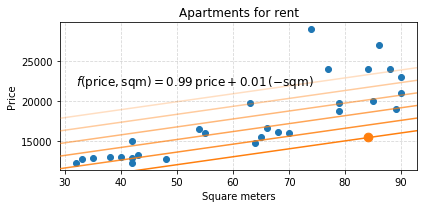

In [14]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Apartments for rent")

ax.scatter(df_apartments.square_meters, df_apartments.price, zorder=9)

xlim = ax.get_xlim()
ylim = ax.get_ylim()


ax.scatter([84], [15500], zorder=12, color=COLORS[1], s=75)

x = np.linspace(0, 100)

for i, diff in enumerate(np.linspace(7150, 15000, num=6)):
    ax.plot(x, diff + 99 * x, zorder=15, color=COLORS[1], alpha=1 - 0.15 * i)

ax.annotate(r'$f(\mathrm{price}, \mathrm{sqm}) = 0.99 \, \mathrm{price} + 0.01 \, (-\mathrm{sqm})$', xy=(32, 22000), xycoords='data',
            zorder=50, fontsize=12
            )

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel("Square meters")
ax.set_ylabel("Price")

ax.grid(True, ls="--", zorder=5, alpha=0.5)
plt.tight_layout()
plt.savefig("apartments3.pdf")

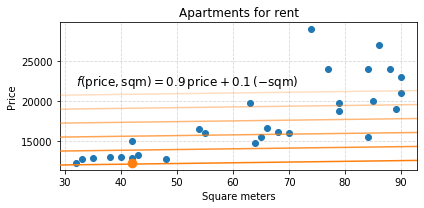

In [15]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Apartments for rent")

ax.scatter(df_apartments.square_meters, df_apartments.price, zorder=9)

xlim = ax.get_xlim()
ylim = ax.get_ylim()


ax.scatter([42], [12300], zorder=12, color=COLORS[1], s=75)

x = np.linspace(0, 100)

for i, diff in enumerate(np.linspace(11800, 20500, num=6)):
    ax.plot(x, diff + 9 * x, zorder=15, color=COLORS[1], alpha=1 - 0.15 * i)

ax.annotate(r'$f(\mathrm{price}, \mathrm{sqm}) = 0.9 \, \mathrm{price} + 0.1 \, (-\mathrm{sqm})$', xy=(32, 22000), xycoords='data',
            zorder=50, fontsize=12
            )

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel("Square meters")
ax.set_ylabel("Price")

ax.grid(True, ls="--", zorder=5, alpha=0.5)
plt.tight_layout()
plt.savefig("apartments4.pdf")

In [16]:
from scipy.spatial import ConvexHull

cvxhull = df_apartments.iloc[ConvexHull(df_apartments.values).vertices,:]

list(cvxhull.square_meters)

[84, 42, 32, 33, 74, 86, 90, 90, 89]

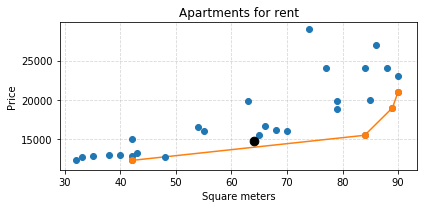

In [17]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Apartments for rent")

ax.scatter(df_apartments.square_meters, df_apartments.price, zorder=9)

ax.scatter([84, 42, 90, 89], 
           [15500, 12300, 21000, 19000], zorder=9)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 14800 	64
ax.scatter([64], [14800], zorder=12, color="k", s=75)

edges = pd.DataFrame({"x":[84, 42, 90, 89], "y":[15500, 12300, 21000, 19000]})
edges = edges.sort_values("x")

ax.plot(edges.x, edges.y, color=COLORS[1])


ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel("Square meters")
ax.set_ylabel("Price")

ax.grid(True, ls="--", zorder=5, alpha=0.5)
plt.tight_layout()
plt.savefig("apartments5.pdf")

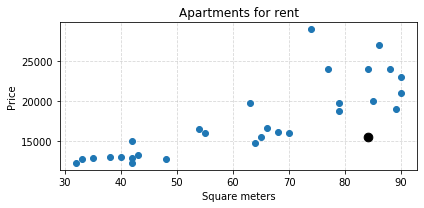

In [18]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Apartments for rent")

ax.scatter(df_apartments.square_meters, df_apartments.price, zorder=9)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.scatter([84], [15500], zorder=12, color="k", s=75)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel("Square meters")
ax.set_ylabel("Price")

ax.grid(True, ls="--", zorder=5, alpha=0.5)
plt.tight_layout()
plt.savefig("apartments6.pdf")

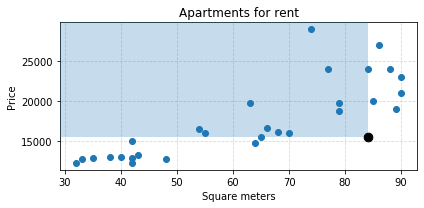

In [19]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Apartments for rent")

ax.scatter(df_apartments.square_meters, df_apartments.price, zorder=9)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.scatter([84], [15500], zorder=12, color="k", s=75)

# 15500 84

left, bottom, width, height = (0, 15500, 84, 20000)
rect = plt.Rectangle((left, bottom), width, height,
                     facecolor=COLORS[0], alpha=0.25, zorder=7)
ax.add_patch(rect)


ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel("Square meters")
ax.set_ylabel("Price")

ax.grid(True, ls="--", zorder=5, alpha=0.5)
plt.tight_layout()
plt.savefig("apartments7.pdf")

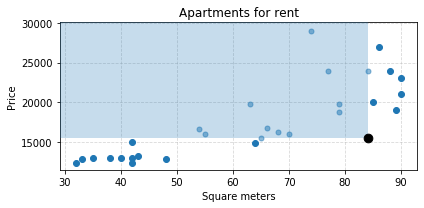

In [20]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Apartments for rent")

at_least_as_good = ((df_apartments.square_meters <= 84) & (df_apartments.price >= 15500))
dominated = at_least_as_good & ((df_apartments.square_meters < 84) | (df_apartments.price > 15500))


ax.scatter(df_apartments[~dominated].square_meters, df_apartments[~dominated].price, zorder=9)
ax.scatter(df_apartments[dominated].square_meters, df_apartments[dominated].price, 
           zorder=9, alpha=0.5, color=COLORS[0], s=25)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.scatter([84], [15500], zorder=12, color="k", s=75)

# 15500 84

left, bottom, width, height = (0, 15500, 84, 20000)
rect = plt.Rectangle((left, bottom), width, height,
                     facecolor=COLORS[0], alpha=0.25, zorder=7)
ax.add_patch(rect)


ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel("Square meters")
ax.set_ylabel("Price")

ax.grid(True, ls="--", zorder=5, alpha=0.5)
plt.tight_layout()
plt.savefig("apartments8.pdf")
plt.savefig("apartments8.png", dpi=200)

18


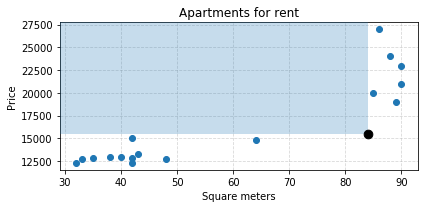

In [21]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Apartments for rent")

at_least_as_good = ((df_apartments.square_meters <= 84) & (df_apartments.price >= 15500))
dominated = at_least_as_good & ((df_apartments.square_meters < 84) | (df_apartments.price > 15500))

print(len(df_apartments[~dominated]))

ax.scatter(df_apartments[~dominated].square_meters, df_apartments[~dominated].price, zorder=9)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.scatter([84], [15500], zorder=12, color="k", s=75)

# 15500 84

left, bottom, width, height = (0, 15500, 84, 20000)
rect = plt.Rectangle((left, bottom), width, height,
                     facecolor=COLORS[0], alpha=0.25, zorder=7)
ax.add_patch(rect)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel("Square meters")
ax.set_ylabel("Price")

ax.grid(True, ls="--", zorder=5, alpha=0.5)
plt.tight_layout()
plt.savefig("apartments9.pdf")

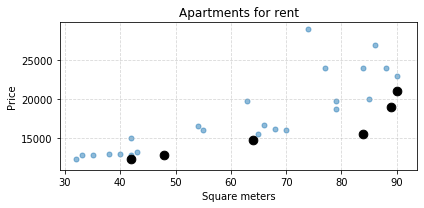

In [22]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Apartments for rent")

mask = paretoset(df_apartments, sense=[min, max])

ax.scatter(df_apartments[~mask].square_meters, df_apartments[~mask].price, alpha=0.5, color=COLORS[0], s=25)
ax.scatter(df_apartments[mask].square_meters, df_apartments[mask].price, zorder=9, color="k", s=75)

ax.set_xlabel("Square meters")
ax.set_ylabel("Price")

ax.grid(True, ls="--", zorder=5, alpha=0.5)
plt.tight_layout()
plt.savefig("apartments10.pdf")

In [23]:
sum(mask), len(df_apartments)

(6, 30)

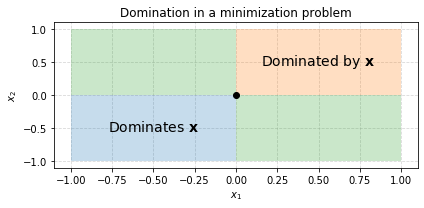

In [24]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Domination in a minimization problem")


left, bottom, width, height = (-1, -1, 1, 1)
rect = plt.Rectangle((left, bottom), width, height, facecolor=COLORS[0], alpha=0.25, zorder=7)
ax.add_patch(rect)
ax.text(x=-0.775, y=-0.55, s=r"Dominates $\mathbf{x}$", fontsize=14, zorder=10)

left, bottom, width, height = (0, 0, 1, 1)
rect = plt.Rectangle((left, bottom), width, height, facecolor=COLORS[1], alpha=0.25, zorder=7)
ax.add_patch(rect)
ax.text(x=0.15, y=0.45, s=r"Dominated by $\mathbf{x}$", fontsize=14, zorder=10)

left, bottom, width, height = (0, -1, 1, 1)
rect = plt.Rectangle((left, bottom), width, height, facecolor=COLORS[2], alpha=0.25, zorder=7)
ax.add_patch(rect)

left, bottom, width, height = (-1, 0, 1, 1)
rect = plt.Rectangle((left, bottom), width, height, facecolor=COLORS[2], alpha=0.25, zorder=7)
ax.add_patch(rect)

ax.scatter([0], [0], color="k", zorder=10)


ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")

ax.grid(True, ls="--", zorder=5, alpha=0.5)
plt.tight_layout()
plt.savefig("domination.pdf")
plt.savefig("domination.png", dpi=200)